In [1]:
import pyreadr #para leer datos de tipo RData
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
from matplotlib import colors

(<matplotlib.image.AxesImage at 0x1ec7b3ea160>,
 Text(0.5, 1.0, 'Imagen de Munich'),
 (np.float64(-0.5), np.float64(458.5), np.float64(493.5), np.float64(-0.5)))

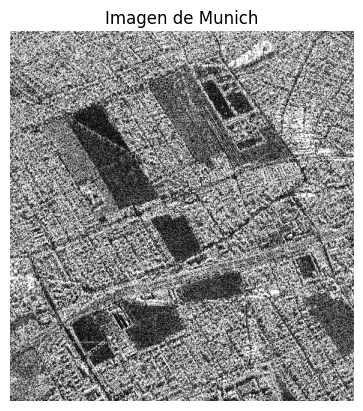

In [2]:
imageMunich = pyreadr.read_r('data/real_SAR_images/Munich.RData')
Munich = np.array(list(imageMunich.items())[0][1])

img1 = np.array(Munich, dtype=np.float64)
# Normalizar:
img2 = (img1 - np.min(img1)) * 65536/(np.max(img1) - np.min(img1))
# Pasar a uint16
img3 = np.array(img2, dtype=np.uint16)

def Ecualizauint16(img):
    hist,bins = np.histogram(img.flatten(),65536,[0,65536])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)  
    cdf_m = (cdf_m - cdf_m.min())*65535/(cdf_m.max()-cdf_m.min())
    cdf_equ= np.ma.filled(cdf_m,0).astype('uint16')
    return cdf_equ[img]

img4 = Ecualizauint16(img3)
plt.imshow(img4,cmap='gray'),plt.title('Imagen de Munich'), plt.axis('off')